# Praktische Optimierung Blatt 06
### Tobias Lotz:  217856 <br>
### Alexander van der Staay:  185444

In [1]:
import numpy as np
from cma import fmin, CMAOptions
from statistics import median
from math import inf
import matplotlib.pyplot as plt

### Aufgabe 6.1 
auf eigener Seite in PDF <br> <br>
__Visualisierung:__

In [2]:
def p(v, k): 
    tmp = (v - 1) / (2 * (v - 2))
    q = -tmp  + np.sqrt(tmp**2 - (0.5 / -1.5))
    denom = 0
    for i in [-1, 0, 2]:
        denom += q**np.abs(i)

    return q**np.abs(k) / denom

/tmp/ipykernel_16530/2351593922.py:2: RuntimeWarning: divide by zero encountered in divide
  tmp = (v - 1) / (2 * (v - 2))
/tmp/ipykernel_16530/2351593922.py:3: RuntimeWarning: invalid value encountered in add
  q = -tmp  + np.sqrt(tmp**2 - (0.5 / -1.5))


Text(0.5, 1.0, 'bestimme Wahrscheinlichkeiten in Abhängigkeit von v in (0,2)')

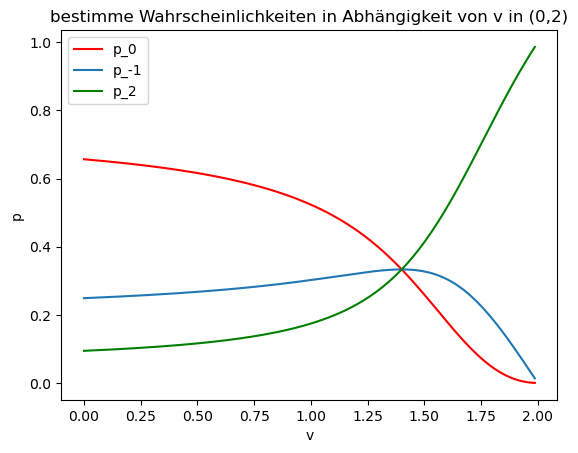

In [3]:
vs = np.linspace(0, 2, 150)
p_n1 = p(vs, -1)
p_0  = p(vs,  0)
p_2  = p(vs,  2)

fig, ax = plt.subplots()

ax.plot(vs, p_0, c="red")
ax.plot(vs, p_n1)
ax.plot(vs, p_2, c="green")
plt.legend(labels=['p_0', 'p_-1', 'p_2'])
plt.xlabel("v")
plt.ylabel("p")
plt.title("bestimme Wahrscheinlichkeiten in Abhängigkeit von v in (0,2)")

### Aufgabe 6.2 

In [4]:
def f(x): return x[0]**3 - x[1]**3 + x[1]**2 + 1000 * np.cos(x[0]) * np.sin(x[1])

In [5]:
np.random.seed(1)

In [6]:
MAX_EVAL = 500
sigma = 0.5

start_values = np.random.uniform(-10, 10, (20, 2))

In [7]:
start_values[0]

array([-1.65955991,  4.40648987])

In [8]:
"""
    Findet die besten Parameter für CMA-ES in einem gegeben Intervall 
    für lambda.Testet dafür jeden Lambda-Wert und alle Werte von 1 
    bis Lambda für Mu.
    
    Parameters:
        nbr_starting (int): Anzahl der Zufällig gezogenen Startpunkte.
        max_lam (int): Maximalwert für lambda.
    
    Returns:
      dict:
        'mu' (int): bester gefundener Wert für mu.
        'lam' (int): bester gefundener Wert für lambda.
        'fun' (float): medianer Zielfunktionswert der gefundenen Optima.
        'multi' (float): medianer Zielfunktionswert der Multistartansätze.
        'amts' (ndarry): Anzahl der Zielfunktionsauswertungen.
        'dev' (ndarray): absolute Abweichung von amts zum Sollwert 500.
        'lt_pairs' (ndarray): Tuple mit (lambda, bester Zielfunktionswert für lambda)
    """
def find_best_params(nbr_starting, max_lam=25):
    MAX_EVAL = 500
    sigma = 0.5
    start_values = np.random.uniform(-10, 10, (nbr_starting, 2))

    global_best = inf
    global_multi = None
    global_amts = None
    best_mu = None
    best_lam = None
    lmt_pairs = []

    # Starte mit lam = 3 und betrachte alle lambdas bis zu max_lambda
    for lam in range(3, max_lam):
        local_best = inf
        local_multi = None
        local_amts = None
        local_mu = None

        # betrachte alle mu Werte von 1 bis lambda
        for mu in range(1, lam+1):
            target_vals = []
            amount_evals = []
            targets_multistart = []

            for _ in range(10):
                for x0 in start_values: 
                    best_eval = inf
                    res = fmin(f, x0=x0, sigma0=sigma, 
                               options={'CMA_mu' : mu, 
                                        'maxfevals' : MAX_EVAL, 
                                        'popsize' : lam,   # lambda
                                        'seed':1,
                                        'verbose' : -9,
                                        'bounds' : [[-10, -10], [10, 10]]})

                    # Beste Evaluation des Multistart festhalten
                    if res[1] < best_eval:
                        best_eval = res[1]

                    # Funktionswert und Anzahl der Auswertungen speichern 
                    target_vals.append(res[1])
                    amount_evals.append(res[3])

                # Ergebnis von Multistart festhalten
                targets_multistart.append(best_eval)
            
            # Mediane berechnen
            median_target_multistart = median(targets_multistart)
            median_target_value = median(target_vals)

            # Lösung für gegebens lambda ist besser als für 
            # vorherige Lambdas
            if median_target_value < local_best:
                local_best = median_target_value
                local_amts = amount_evals
                local_multi = median_target_multistart
                local_mu = mu

        if local_best < global_best:
            global_best = local_best
            global_multi = local_multi
            global_amts = local_amts
            best_mu = local_mu
            best_lam = lam

        lmt_pairs.append((lam, local_mu, local_best))

    total_deviation = np.abs(np.array(global_amts) - 500)

    return {'mu' : best_mu, 'lambda' : best_lam, 'fun' : global_best, 
            'multi' : global_multi,'amts' : global_amts, 
            'dev' : total_deviation, 'lmt_pairs' : lmt_pairs}


In [9]:
res = find_best_params(20)

In [15]:
print(f'Totaler Median:\t\tMedian Multistart:\tMu:\tlambda:')
print(f'{res["fun"] : .2f}\t\t\t{res["multi"] : .2f}\t\t{res["mu"]}\t{res["lambda"]}\n')
print(f'Totale Auswertungen:')
output = f''
for i, a in enumerate(res["amts"]):
    output += f"{a} "
    if (i + 1) % 15 == 0:
        output += "\n"
print(f'{output}\n\nAbweichung von Sollwert:')
output = f''
for i, a in enumerate(res["dev"]):
    output += f"{a} "
    if (i+1) % 15 == 0:
        output += "\n"
print(output)

Totaler Median:		Median Multistart:	Mu:	lambda:
-1249.06			-842.85		7	17

Totale Auswertungen:
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 511 511 511 511 511 511 511 511 511 511 
511 511 511 511 511 

Abweichung von Sollwert:
11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 
11 11 11 11 11 11 1

# Beste Parameter: 
### $\lambda = 17 ; \mu = 7$ ; median $(fun) = -1249.06$

### Visualisierung der Zielfunktionswerte in Abhängigkeit von lambda

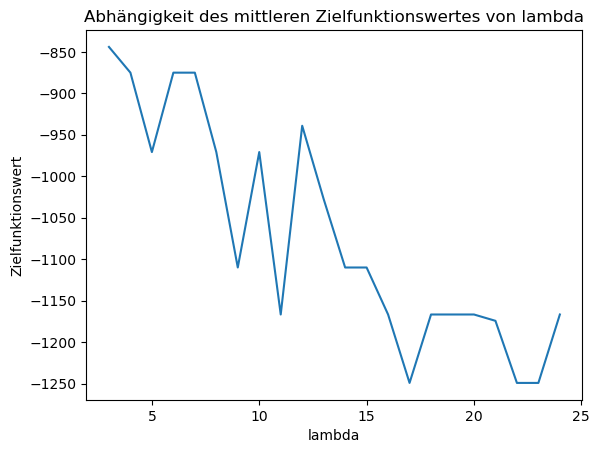

In [11]:
lams_target_pairs = res["lmt_pairs"]

lams = []
tars = []
for (x, y, z) in lams_target_pairs:
    lams.append(x)
    tars.append(z)

fig, ax = plt.subplots()

plt.title("Abhängigkeit des mittleren Zielfunktionswertes von lambda")
plt.xlabel("lambda")
plt.ylabel("Zielfunktionswert")
ax.plot(lams, tars)

Der mittlere Wert der Zielfunktion nimmt stets eine Weile ab und nimmt anschließend wieder stark zu. Dieses "Auf und Ab" Verhalten tendiert allerdings zu immer kleineren Zielfunktionswerten. Bei $\lambda = 17$ scheint der beste Wert erreicht zu werden. Für $~ \lambda = 22$ liegt ein ähnlicher oder gleicher Wert vor, allerdings wird bei meiner Implemtierung der erste minimale Wert als Lösung verwendet. Alle Ausführungen haben genau $511$ Zielfunktionsauswertungen durchgeführt und somit das Budge um den Wert $11$ überschritten. Der tatsächliche mittlere Wert der Zielfunktion beträgt $-1249,06$ und das beste $\mu$ für $\lambda = 17$ war $\mu = 7$.